# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Yalaka Surya Teja Reddy<br>
Roll Number: 2020101042

In [209]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

Defaulting to user installation because normal site-packages is not writeable


In [210]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
from random import sample

## Load Data

In [211]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [212]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [213]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


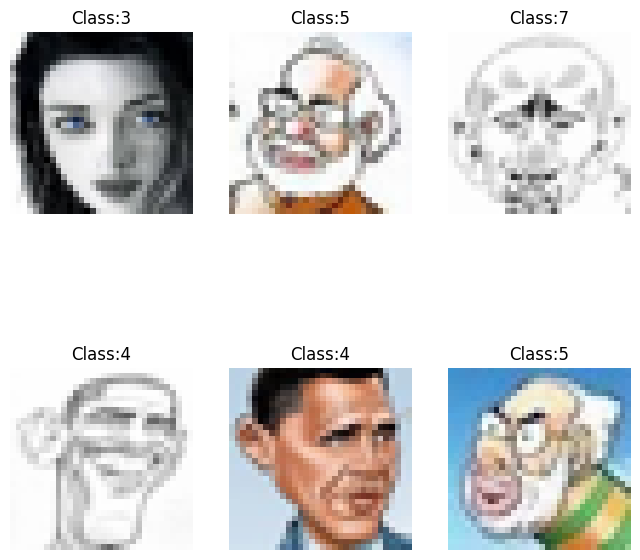

In [214]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [215]:
Matrix=np.empty(shape=(N,H*W*C))
for i in range(0,len(X)):
    y=np.array(X[i])
    Matrix[i]=y.flatten()
print(Matrix.shape)
Matrix=Matrix-np.mean(Matrix,axis=0)
Covariance=np.cov(Matrix.T)
print(Covariance.shape)
print(X.shape)


(672, 3072)
(3072, 3072)
(672, 32, 32, 3)


## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

# write function


#### Compute eigen values and plot eigen value spectrum

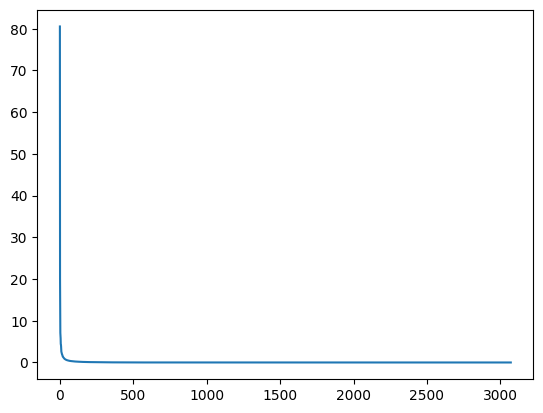

In [216]:
# eigen values and spectrum
def geteigen_values(x):
    w,v=np.linalg.eigh(x)
    index = w.argsort()[::-1]   
    eigenValues = w[index]
    eigenVectors = v[:,index]
    return eigenValues,eigenVectors

eigenvalues,eigenvectors=geteigen_values(Covariance)
plt.plot(eigenvalues)

#### Plot the percentage of variances vs the number of principal components

90% variance at  115


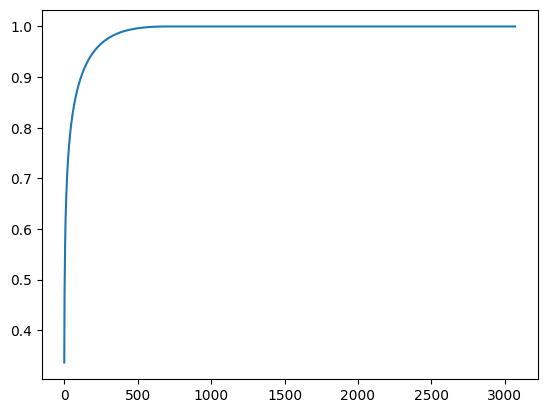

In [217]:
# plot variance vs components
pcas_90_total=0
def plotvariance(eigenvalues):
    total = np.sum(eigenvalues)
    variances=[]
    sum=0
    bool =0
    for i in range(0,len(eigenvalues)):
        sum+=eigenvalues[i]
        variances.append(sum/total)
        if sum/total > 0.9 and bool == 0:
            print("90% variance at ",i+1)
            bool = 1
            pcas_90_total = i+1
    plt.plot(variances)
    return pcas_90_total
pcas_90_total =  plotvariance(eigenvalues)
        
    

#### Visualize eigen faces(eigen vectors)

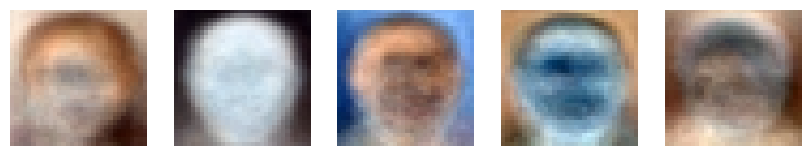

In [218]:



def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigenvectors,H,W,C, indices)


we can see that the faces are all round, which means statistically the best vectors have data about shape. But they are ghost because different people have different features at different places, i,e the eyes and all are different. So one vector has hair info etc.

#### Reconstruction 

(7, 3072)


/tmp/ipykernel_93667/3273757046.py:9: RuntimeWarning: invalid value encountered in divide
  ele = (ele - minim) / (maxim - minim)


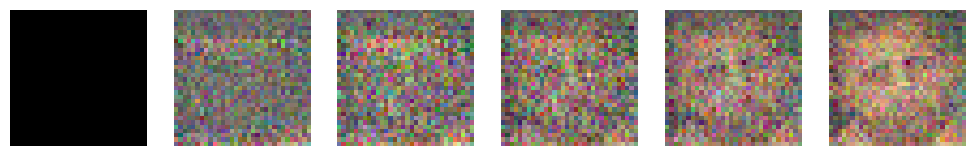

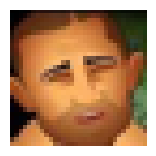

In [219]:
# reconstruction
def reconstructions(index):
    recon=np.zeros((1,3072))
    for num in range(1,3000,500):
        indexes = range(1,num)
        image = np.array(X[index]).flatten()
        eigen_matrix = eigenvectors[indexes]
        transformed=np.dot(eigen_matrix,image)
        recon = np.append(recon,np.dot(eigen_matrix.T,transformed).reshape(1,3072),axis=0)
    # display_images([np.reshape(recon,(32,32,3))],[y[0]],col=1)
    print(recon.shape)
    plot(recon.T,H,W,C, [1,2,3,4,5,6])
    plot(image,H,W,C, [0])
    return recon
re = reconstructions(0)
        

We can see that the face becomes more clearer for eigen vectors from 0 to 3000.

#### Plot data in 2D

1213.40234375
982.705222779087
786.5469023637154
606.1478442119608
421.3598235127316
225.77930919441886


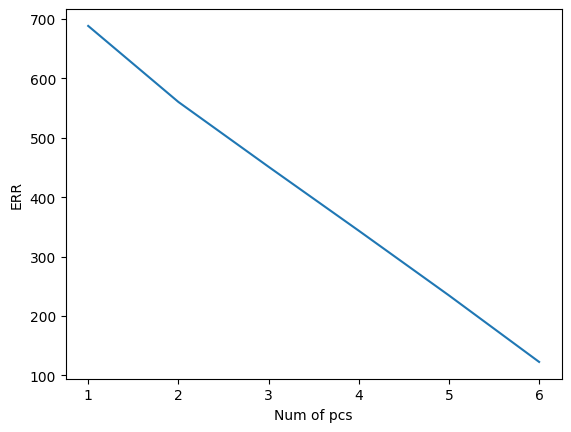

In [233]:
# plot data in 2D
err_ind = []
err = []
for i in range(1,7):
    err_ind.append(i)
    err.append(np.sum(np.square((re[i]-X[0].flatten()))))
    print(np.sum((X[0].flatten()-re[i])))
plt.plot(err_ind,err)
plt.ylabel("ERR")
plt.xlabel("Num of pcs")
plt.show()



## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [221]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [222]:
# visualize
class_imgs = []
eigenvalues=[]
eigenvectors=[]
for i in range(0,8):
    class_imgs.append([])
    eigenvalues.append([])
    eigenvectors.append([])
for i in range(0,len(X)):
    class_imgs[int(y[i])].append(np.array(X[i]).flatten())
for i in range(0,8):
    M =np.array( class_imgs[i])
    M= M-np.mean(M,axis=0)
    Cov = np.cov(M.T)
    eigenvalues[i],eigenvectors[i]=geteigen_values(Cov)

    


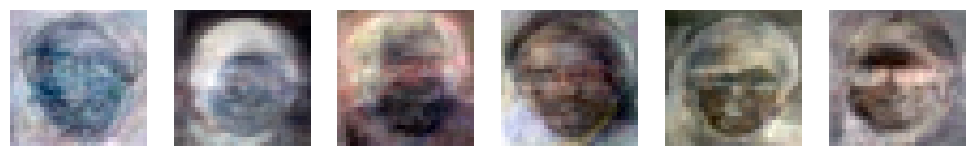

Class 0


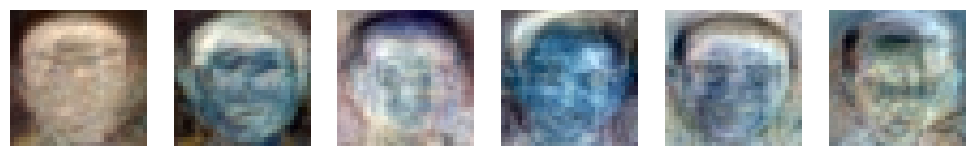

Class 1


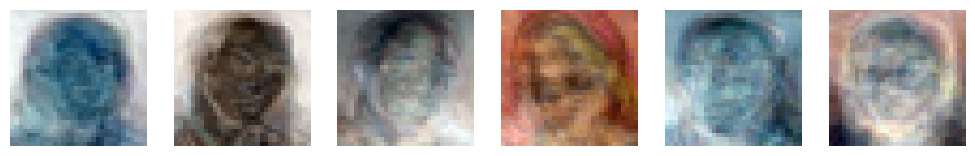

Class 2


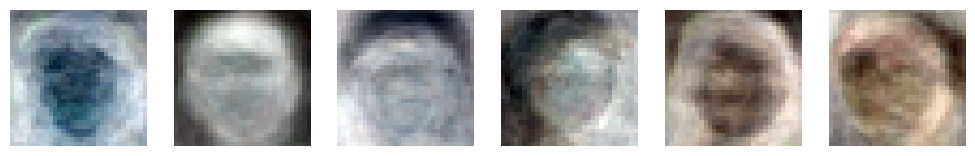

Class 3


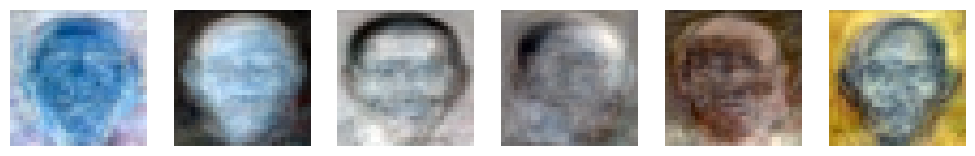

Class 4


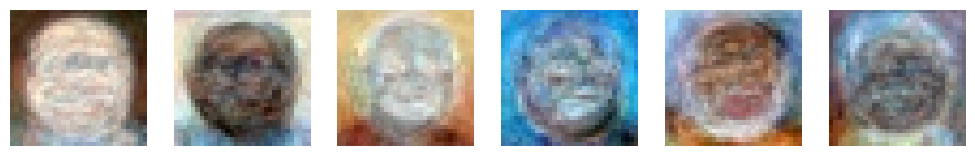

Class 5


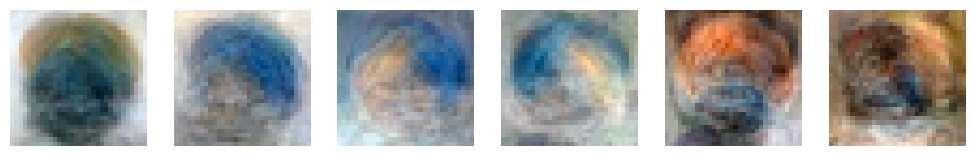

Class 6


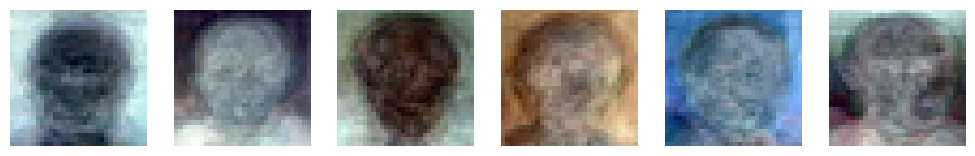

Class 7


In [223]:
for i in range(0,8):
    plot(eigenvectors[i],H,W,C,[0,1,2,3,4,5])
    print("Class", i)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [224]:
# components required
for i in range(0,8):
    ind = 0
    sum = 0
    temp = np.array(eigenvalues[i])
    total = np.sum(temp)
    for j in range(0,len(eigenvalues[i])):
        sum += eigenvalues[i][j]
        if sum/total > 0.9:
            print("Class", i , " needs", j+1," principal components")
            break
print( "Total Dataset needs", pcas_90_total)
        

Class 0  needs 21  principal components
Class 1  needs 24  principal components
Class 2  needs 28  principal components
Class 3  needs 36  principal components
Class 4  needs 43  principal components
Class 5  needs 57  principal components
Class 6  needs 50  principal components
Class 7  needs 44  principal components
Total Dataset needs 115


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

For each classes the pc changes, which is to be ecpected since diiferent classes have different samples and some faces may be aligned different or bigger smaller more , i,e variance in each class may be different. For total pcas are more since all classes variance is included , i.e samples of all classes combined need more dimensions to have most information compared to individual classes that require smaller since they are similar.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [225]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [226]:
# code here
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def PCA_regg(ncomp):
    pca = PCA(n_components=int(ncomp))
    pca.fit(X)
    pcaX=pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pcaX, label, test_size = 0.2)
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    return (model.score(X_test,y_test))

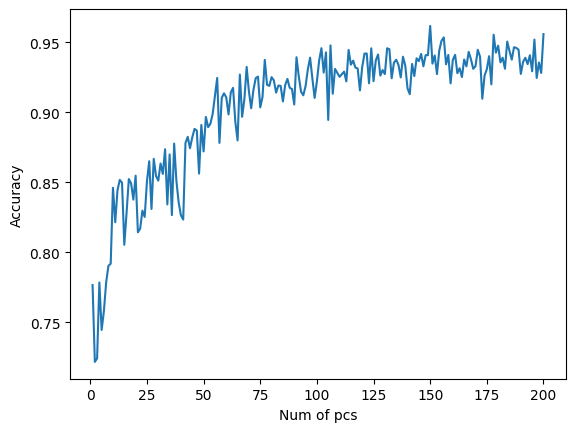

In [227]:
# analysis / plot (split the cells if required)
xaxis = []
accuracies = []
for i in range(1,201):
    xaxis.append(i)
    accuracies.append(PCA_regg(i))
plt.plot(xaxis,accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Num of pcs")
plt.show()

We see that at the satrt itself with some < 10 eigen vectors the accuracy is > 0.75. 50 gives 0.85 and 100 gives 0.9 accuracy with is also same as 115 pcs required for keeping 0.9 variance. As variance increases in dimensions, accuracy also increases, testament to pca
 